Los datos han sido descargados y guardados en datos_heart_failure.csv
Procesamiento completado. Resultados guardados en datos_procesados.csv


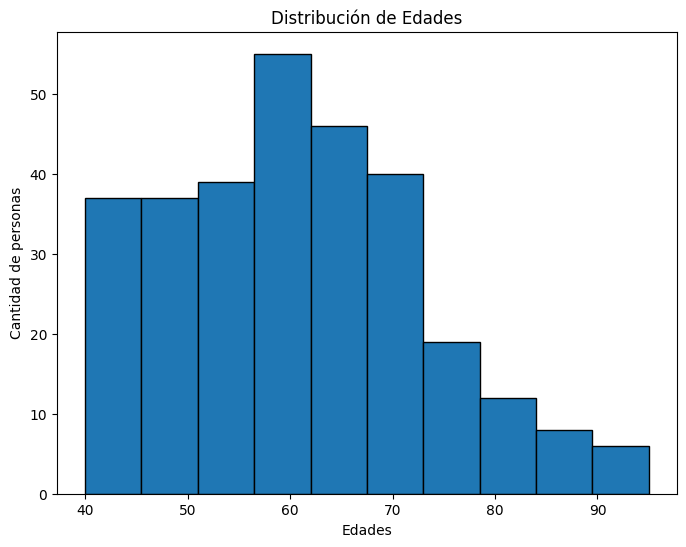

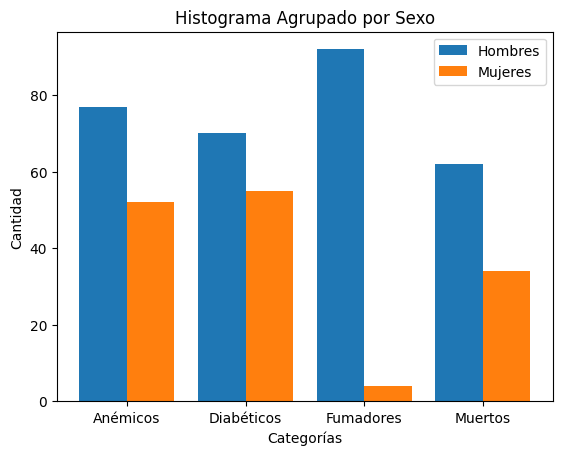

In [13]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

def descargar_datos(url, nombre_archivo):
    # Realizar el GET request
    respuesta = requests.get(url)
    
    # Verificar si la solicitud fue exitosa (código de estado 200)
    if respuesta.status_code == 200:
        # Guardar la respuesta en un archivo CSV
        with open(nombre_archivo, 'wb') as archivo:
            archivo.write(respuesta.content)
        print(f"Los datos han sido descargados y guardados en {nombre_archivo}")
    else:
        print(f"Error al descargar los datos. Código de estado: {respuesta.status_code}")

def procesar_datos(dataframe):
    # Verificar valores faltantes
    if dataframe.isnull().any().any():
        print("Existen valores faltantes. Realice la imputación o eliminación según sea necesario.")
        dataframe = dataframe.dropna()  # Eliminar filas con valores faltantes

    # Verificar filas duplicadas
    if dataframe.duplicated().any():
        print("Existen filas duplicadas. Realice la eliminación de duplicados.")
        dataframe = dataframe.drop_duplicates()

    # Verificar y eliminar valores atípicos (puedes ajustar este paso según tu criterio)
    # Por ejemplo, eliminando las filas con valores atípicos en la columna 'age'
    q1 = dataframe['age'].quantile(0.25)
    q3 = dataframe['age'].quantile(0.75)
    iqr = q3 - q1
    filtro_sin_atipicos = (dataframe['age'] >= q1 - 1.5 * iqr) & (dataframe['age'] <= q3 + 1.5 * iqr)
    dataframe = dataframe[filtro_sin_atipicos]

    # Crear columna de categorías por edades
    bins = [0, 12, 19, 39, 59, float('inf')]
    labels = ['Niño', 'Adolescente', 'Joven adulto', 'Adulto', 'Adulto mayor']
    dataframe['categoria_edad'] = pd.cut(dataframe['age'], bins=bins, labels=labels, right=False)

    # Guardar el resultado como CSV
    nombre_archivo_salida = "datos_procesados.csv"
    dataframe.to_csv(nombre_archivo_salida, index=False)

    print(f"Procesamiento completado. Resultados guardados en {nombre_archivo_salida}")

# Modificar la URL aquí
url_datos = "https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv"

# Nombre del archivo de salida
nombre_archivo_salida = "datos_heart_failure.csv"

# Llamar a la función para descargar los datos
descargar_datos(url_datos, nombre_archivo_salida)

# Cargar el DataFrame desde el CSV descargado
datos = pd.read_csv(nombre_archivo_salida)

# Llamar a la función para procesar los datos
procesar_datos(datos)

# Graficar la distribución de edades con un histograma
plt.figure(figsize=(8, 6))
plt.hist(datos['age'], bins=10, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Cantidad de personas')
plt.show()

# Graficar histogramas agrupados por hombre y mujer
df_anaemia = datos.groupby("sex")["anaemia"].sum()
df_diabetes = datos.groupby("sex")["diabetes"].sum()
df_smoking = datos.groupby("sex")["smoking"].sum()
df_dead = datos.groupby("sex")["DEATH_EVENT"].sum()

df_total_hom = [df_anaemia[1], df_diabetes[1], df_smoking[1], df_dead[1]]
df_total_muje = [df_anaemia[0], df_diabetes[0], df_smoking[0], df_dead[0]]

etiquetas = ["Anémicos", "Diabéticos", "Fumadores", "Muertos"]
ancho = 0.4

plt.bar(etiquetas, df_total_hom, width=-ancho, align='edge', label='Hombres')
plt.bar(etiquetas, df_total_muje, width=ancho, align='edge', label='Mujeres')

plt.legend()
plt.title('Histograma Agrupado por Sexo')
plt.xlabel('Categorías')
plt.ylabel('Cantidad')

plt.show()